In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# FFT Auswertung U_Gen Rotorauslenkung

In [25]:
from pathlib import Path
folder='./Helper_scripts/'
#folder='/home/kalap/Kai/MasterETTUWien/Studium_Aktiv/Masterarbeit_Wind/MessElektronikSoftware/AuswertungScript/'

importLibs=1
for path in Path(folder).rglob('*.py'):
    print(path.name)
    exec(open(path).read())

parseCC.py
GetFrequencyFromZCfile.py
VariablesExperiment.py
RotSpeedLines0.py
importLibs0.py
FFT.py
DisplayAndCut.py


In [4]:
#df.pivot(columns='Date', values='Value').head(1)
VariablesExperiment(20210727)

In [5]:
#characteristische Frequenzen
fc=[31,150,220]
nf(f=fc[0],ret='n_rpm')/60

f_el_31und 2p=12.0ergibt n=155.0 rpm


2.5833333333333335

In [6]:
scope_dat

Unnamed: 0  Index1      Date Description0   Part              Description1  \
0         117     118  20210727     Aufnahme  scope                        52   
1         118     119  20210727     Aufnahme  scope                        53   
2         119     120  20210727     Aufnahme  scope                        54   
3         120     121  20210727     Aufnahme  scope                        55   
4         121     122  20210727     Aufnahme  scope                        56   
5         123     124  20210727     Aufnahme  scope                        58   
6         124     125  20210727     Aufnahme  scope                        59   
7         125     126  20210727     Aufnahme  scope                        60   
8         126     127  20210727     Aufnahme  scope                        61   
9         127     128  20210727     Aufnahme  scope  62,63,64 (einfaches csv)   

                                          SerialFile  \
0  ../measurement_data/20210727/ZC/Lines_20210727...   
1  ../measurement_data/20210727/ZC/Lines_20210727...   
2  ../measurement_data/20210727/ZC/Lines_20210727...   
3  ../measurement_data/20210727/ZC/Lines_20210727...   
4  ../measurement_data/20210727/ZC/Lines_20210727...   
5  ../measurement_data/20210727/ZC/Lines_20210728...   
6  ../measurement_data/20210727/ZC/Lines_20210728...   
7  ../measurement_data/20210727/ZC/Lines_20210728...   
8  ../measurement_data/20210727/ZC/Lines_20210728...   
9  ../measurement_data/20210727/ZC/Lines_20210728...   

                                           ScopeFile          Symbol CalcByPy  \
0  ../measurement_data/20210727/scope/scope_52_1.csv  Rotor_Deviated      NaN   
1  ../measurement_data/20210727/scope/scope_53_1.csv  Rotor_Deviated      NaN   
2  ../measurement_data/20210727/scope/scope_54_1.csv  Rotor_Deviated      NaN   
3  ../measurement_data/20210727/scope/scope_55_1.csv  Rotor_Deviated      NaN   
4  ../measurement_data/20210727/scope/scope_56_1.csv  Rotor_Deviated      NaN   
5  ../measurement_data/20210727/scope/scope_58_1.csv        parallel      NaN   
6  ../measurement_data/20210727/scope/scope_59_1.csv        parallel      NaN   
7  ../measurement_data/20210727/scope/scope_60_1.csv        parallel      NaN   
8  ../measurement_data/20210727/scope/scope_61_1.csv        parallel      NaN   
9  ../measurement_data/20210727/scope/scope_62_1.csv        parallel      NaN   

  2Tex  Value Unit                                 Unnamed: 13  
0  NaN   31.5   Hz  eventuell scope dateien Zähler um 1 falsch  
1  NaN   31.5   Hz                                         NaN  
2  NaN   30.8   Hz                                         NaN  
3  NaN   31.1   Hz                                         NaN  
4  NaN   31.1   Hz                                         NaN  
5  NaN   30.8   Hz                                         NaN  
6  NaN   31.0   Hz                                         NaN  
7  NaN   30.8   Hz                                         NaN  
8  NaN   31.0   Hz                                         NaN  
9  NaN   31.5   Hz                                         NaN

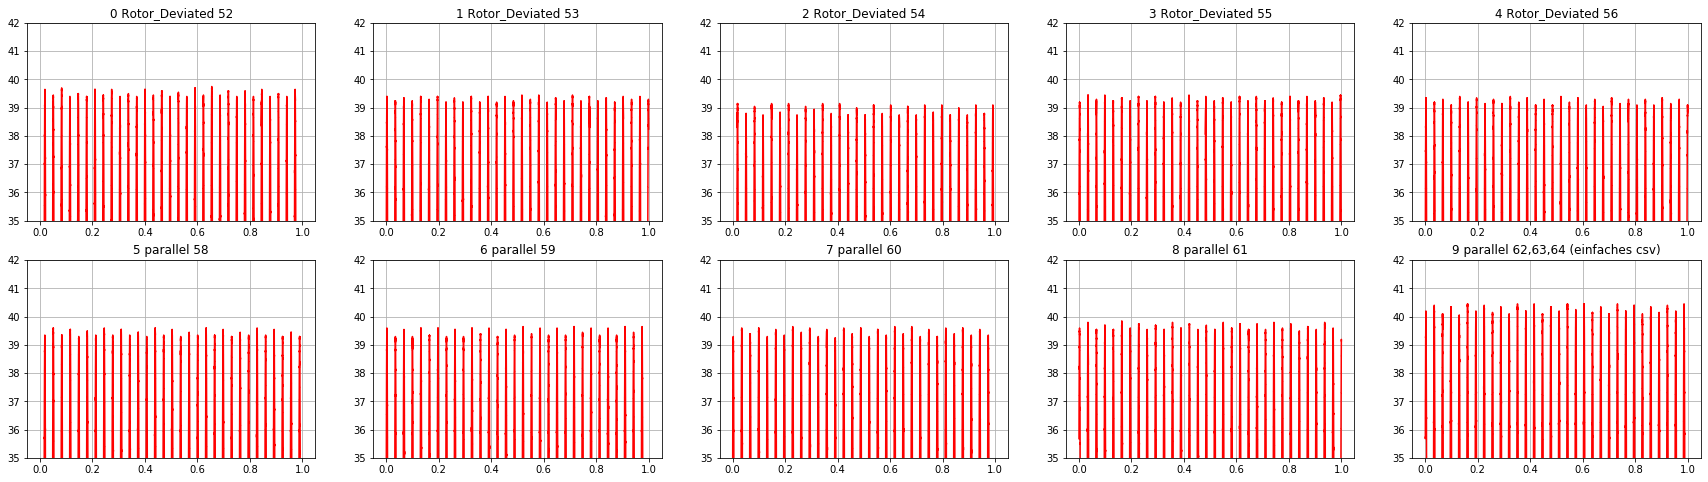

In [7]:
fig, ax = plt.subplots(2,5,figsize = (30,8))
for index, row in scope_dat.loc[:].iterrows():
    if(row['Symbol']=='parallel'):
        ax1=ax[1,index-5]
    else:
        ax1=ax[0,index]
    ax0=ax1
    scope1=pd.read_csv(row['ScopeFile'],sep=",",skiprows=[0],names=['time','sig1'],header=0)
    ax0.plot(scope1['time'],scope1['sig1'],c='red')
    ax0.set_ylim(35,42)
    ax0.set_title(str(index)+ ' '+row['Symbol']+' '+ row['Description1'])
    ax0.grid(True)
    #print(row['ScopeFile'])

# 1. get right time from scope

In [8]:
scan_oscillogram=False

In [9]:
t_start=0.2
t_end=0.8
delta_t=0.2
if(scan_oscillogram):
    scope_fT=pd.DataFrame(columns=['index_scope_dat','ti','tf','f_mag_max','m_fmax'])
    for f in fc:
        name='m_f'+str(f)
        scope_fT[name]=None
    counter=0
    for index, row in scope_dat.loc[:].iterrows():
        for ti in np.arange(t_start,t_end,delta_t):
            scope_fT.loc[counter,'index_scope_dat']=index
            scope_fT.loc[counter,'ti']=ti
            scope_fT.loc[counter,'tf']=ti+0.2
            counter+=1


In [10]:
filename='scope_fT'+'_tstart'+str(t_start)+'_tend'+str(t_end)+'_deltat'+str(delta_t)
filename=filename.replace('.','K')
print(filename)
#dauert 5min
if(scan_oscillogram):
    scope_dat['index_copy']=scope_dat.index
    for index, row in scope_fT.iterrows():
        print(row['index_scope_dat'])
        file=scope_dat.loc[:,'ScopeFile'][row['index_scope_dat']]
        print(file)
        xf,yf, delta_f, totalN=FFT_ASCIIscope_mov2(file,zeroNrel=25,ti=row['ti'],tf=row['tf']) #Zero Padding to achieve delta_f=0.2
        for f in fc:
            name='m_f'+str(f)
            scope_fT.loc[index,name]=yf[np.where((xf>=f-0.1)&(xf<=f+0.1))][0]
        scope_fT.loc[index,'f_mag_max']=xf[np.where(yf.max()==yf)][0]
        scope_fT.loc[index,'m_fmax']=yf.max()
    scope_fT.to_pickle(filename+'.pkl')
else:
    scope_fT=pd.read_pickle(filename+'.pkl')

scope_fT_tstart0K2_tend0K8_deltat0K2


In [11]:
# analyse scope_fT to get right time
for f in fc:
    name='ti_f'+str(f)+'_1sek'
    scope_dat[name]=None

if(scan_oscillogram):
    for index, row in scope_dat.iterrows():
        for f in fc:
            name1='ti_f'+str(f)+'_1sek'
            name2='m_f'+str(f)
            max1=scope_fT.loc[scope_fT['index_scope_dat']==index,name2].max()
            scope_dat.loc[index,name1]=scope_fT.loc[scope_fT[name2]==max1,'ti'].min()


    
    

In [12]:
#fc[0]=30
f=fc[0]
name1='ti_f'+str(f)+'_nearest_1sek'
scope_dat[name1]=None
name2='f'+str(f)+'_nearest_1sek'
scope_dat[name2]=None
name3='m_f'+str(f)+'_nearest_1sek'
scope_dat[name3]=None

for index, row in scope_dat.loc[:].iterrows():
    scope_fT1=scope_fT.loc[scope_fT['index_scope_dat']==index,:]
    #idx=scope_fT1.iloc[(scope_fT1['f_mag_max']-f).abs().argsort()[:1]].index[0]
    idx=scope_fT1.iloc[(scope_fT1['f_mag_max']-f).abs().argsort()[:1]].index[0]
    fmax=scope_fT.iloc[idx]['f_mag_max']
    mfmax=scope_fT1.loc[scope_fT['f_mag_max']==fmax,'m_fmax'].max()
    idx1=scope_fT1.loc[scope_fT['m_fmax']==mfmax,:].index[0]
    scope_dat.loc[index,name1]=scope_fT.iloc[idx1]['ti']
    scope_dat.loc[index,name2]=scope_fT.iloc[idx1]['f_mag_max']
    scope_dat.loc[index,name3]=mfmax

In [13]:
#scope_dat.columns
scope_fT

index_scope_dat   ti   tf f_mag_max   m_fmax    m_f31      m_f150  \
0                0  0.2  0.4   31.5387  8.42425  8.38593   0.0124969   
1                0  0.4  0.6   31.5387  8.42388   8.3829    0.014588   
2                0  0.6  0.8   31.5387  8.42442  8.38201   0.0123561   
3                0  0.8    1   31.5391  8.42111  8.38236   0.0117551   
4                1  0.2  0.4   31.1541  8.36079  8.35756   0.0209888   
5                1  0.4  0.6   31.1541  8.36275  8.35933   0.0208147   
6                1  0.6  0.8   31.1541  8.36569  8.36191   0.0207646   
7                1  0.8    1   31.1544  8.36771   8.3634   0.0202018   
8                2  0.2  0.4   30.7695  8.28769   8.2859   0.0267741   
9                2  0.4  0.6   30.7695   8.2876  8.28549   0.0269079   
10               2  0.6  0.8   30.7695  8.28398  8.28138   0.0266921   
11               2  0.8    1   30.7698  8.28437  8.28157   0.0265371   
12               3  0.2  0.4   31.1541  8.36863  8.36155   0.0198799   
13               3  0.4  0.6   31.1541  8.36532  8.35845   0.0198045   
14               3  0.6  0.8   31.1541  8.36692  8.35978   0.0194069   
15               3  0.8    1   31.1544  8.36759  8.36009   0.0196202   
16               4  0.2  0.4   31.1541  8.35037  8.34713   0.0209551   
17               4  0.4  0.6   31.1541  8.34834   8.3456   0.0208793   
18               4  0.6  0.8   31.1541  8.34267  8.34129   0.0217187   
19               4  0.8    1   31.1544  8.33947  8.33909   0.0225044   
20               5  0.2  0.4   30.9618  8.40134  8.40134   0.0232216   
21               5  0.4  0.6   30.9618  8.39767  8.39767   0.0227923   
22               5  0.6  0.8   30.9618  8.39608  8.39608   0.0233958   
23               5  0.8    1   30.9621  8.39689  8.39689   0.0233704   
24               6  0.2  0.4   30.7695  8.38577  8.38459   0.0235128   
25               6  0.4  0.6   30.7695  8.38801  8.38733   0.0239973   
26               6  0.6  0.8   30.7695  8.39154   8.3914   0.0230676   
27               6  0.8    1   30.9621  8.39347  8.39347   0.0235699   
28               7  0.2  0.4   30.7695  8.38989  8.38954   0.0239497   
29               7  0.4  0.6   30.7695  8.38851  8.38812   0.0237323   
30               7  0.6  0.8   30.7695  8.38659  8.38611   0.0235735   
31               7  0.8    1   30.7698  8.38707  8.38657   0.0239757   
32               8  0.2  0.4   30.9618  8.43291  8.43291   0.0194349   
33               8  0.4  0.6   30.9618  8.43191  8.43191   0.0195402   
34               8  0.6  0.8   30.9618  8.43422  8.43422   0.0200779   
35               8  0.8    1   30.9621  8.43248  8.43248   0.0199368   
36               9  0.2  0.4   31.5387  8.56044  8.50973  0.00930638   
37               9  0.4  0.6   31.5387  8.56216  8.51156  0.00990919   
38               9  0.6  0.8   31.5387  8.56161    8.511  0.00972293   
39               9  0.8    1   31.5391  8.56211  8.51199  0.00970724   

        m_f220  
0     0.012553  
1    0.0128802  
2    0.0131667  
3    0.0126804  
4    0.0119378  
5    0.0117203  
6    0.0122287  
7    0.0119318  
8   0.00861868  
9   0.00880336  
10  0.00869601  
11  0.00859719  
12   0.0123723  
13   0.0126698  
14   0.0124135  
15   0.0130455  
16   0.0125522  
17   0.0120286  
18   0.0119342  
19    0.011603  
20   0.0106353  
21    0.010538  
22   0.0103495  
23   0.0105928  
24   0.0101004  
25  0.00998386  
26   0.0101804  
27   0.0105108  
28  0.00978516  
29   0.0099838  
30  0.00967774  
31   0.0100827  
32   0.0124152  
33   0.0126243  
34   0.0124701  
35   0.0129206  
36   0.0130259  
37   0.0135763  
38   0.0135093  
39   0.0133765

In [14]:
#Künstlcihes Festsetzen von ti
name3='ti_1'
scope_dat['name3']=0.2

In [15]:
scope_dat.to_pickle(filename+'_scope_dat'+'.pkl')

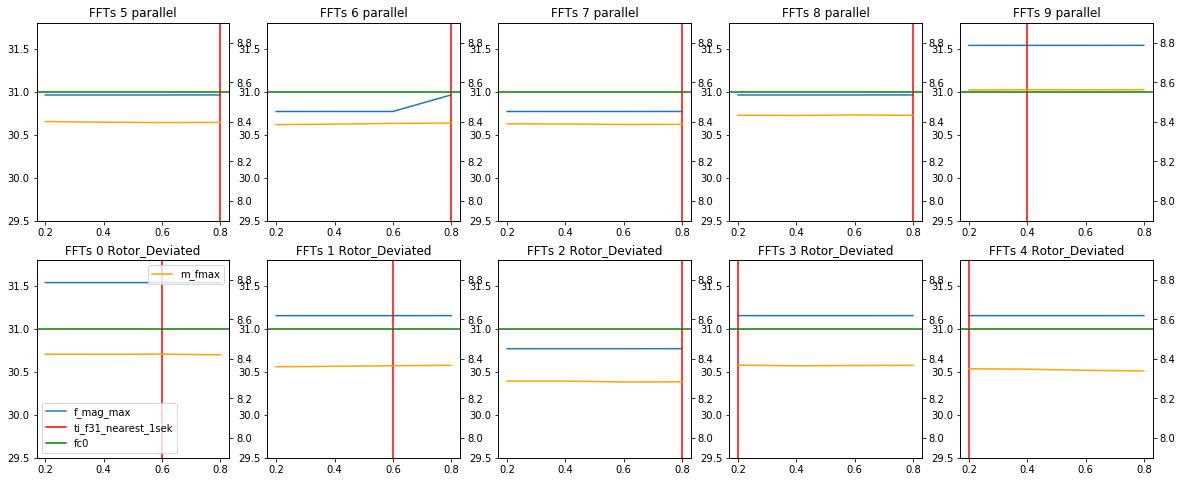

In [17]:
fig, ax = plt.subplots(2,5,figsize = (20,8))
for index, row in scope_dat.loc[:].iterrows():
    index_scope_dat=index
    filter=(scope_fT['index_scope_dat']==index_scope_dat)
    if(row['Symbol']=='parallel'):
        ax1=ax[0,index-5]
    else:
        ax1=ax[1,index]
    #print(ax1)
    ax1.set_ylim(29.5,31.8)
    ax2 = ax1.twinx()
    m_mean=scope_fT['m_fmax'].mean()
    ax2.set_ylim(7.9,8.9)
    ti=scope_fT.loc[filter,'ti']
    ax1.plot(ti,scope_fT.loc[filter,'f_mag_max'],label='f_mag_max')
    ax2.plot(ti,scope_fT.loc[filter,'m_fmax'],c='orange',label='m_fmax')
    ax1.axvline(x=(scope_dat.loc[index_scope_dat,name1]),c='red',label=name1)
    ax1.axhline(y=fc[0],c='green',label='fc0')
    if(index==0):
        ax1.legend(loc=3)
        ax2.legend(loc=1)
    plt.title('FFTs '+str(index_scope_dat)+' '+row['Symbol'])
plt.show()

# 2. FFT für Fenster f0

In [18]:
#scope_dat['name1']=scope_dat['name3']

In [19]:
scope_dat['name1']=0.0

In [20]:
bin_width=10
#ti_col=name='ti_f'+str(fc[0])+'_1sek'
ti_col='ti_f'+str(fc[0])+'_nearest_1sek'
print(ti_col)
for index, row in scope_dat.iterrows():
    xf,yf, delta_f, totalN=FFT_ASCIIscope_mov2(row['ScopeFile'],zeroNrel=4,ti=0,tf=1) #Zero Padding to achieve delta_f=0.2
    if(index==0):
        spek=pd.DataFrame(xf,columns=['freq'])
    spek[index]=yf
    #make bins & store
    bins=xf//bin_width
    df_b0=pd.DataFrame(bins,columns=['bins'])
    df_b0['yf']=pd.DataFrame(yf)
    if(index==0):
        df_b1=df_b0.groupby(['bins']).sum()
        df_b1.rename(columns = {"yf": index}, inplace=True)
    else:
        df_b1[index]=df_b0.groupby(['bins']).sum()
df_b1['bins']=df_b1.index
df_b1['freq']=df_b1['bins']*bin_width
spek_bins=df_b1.copy()

ti_f31_nearest_1sek
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)


In [21]:
#index
len(yf)
#len(xf)

1249997

In [22]:
spek.shape[0]-len(xf)

0

In [23]:
spek

freq         0         1         2         3         4  \
0             0.000000  0.367935  0.359070  0.371330  0.362716  0.363289   
1             0.200001  0.360636  0.351907  0.363984  0.355521  0.356040   
2             0.400001  0.339494  0.331165  0.342707  0.334686  0.335047   
3             0.600002  0.306663  0.298963  0.309669  0.302340  0.302458   
4             0.800003  0.265372  0.258481  0.268120  0.261677  0.261494   
...                ...       ...       ...       ...       ...       ...   
1249992  249999.199997  0.000006  0.000010  0.000008  0.000016  0.000012   
1249993  249999.399998  0.000007  0.000009  0.000009  0.000016  0.000012   
1249994  249999.599999  0.000008  0.000008  0.000011  0.000015  0.000013   
1249995  249999.799999  0.000009  0.000006  0.000013  0.000015  0.000014   
1249996  250000.000000  0.000009  0.000004  0.000014  0.000015  0.000014   

                5         6         7         8         9  
0        0.350886  0.336411  0.343387  0.340915  0.335935  
1        0.343901  0.329727  0.336569  0.334151  0.329205  
2        0.323672  0.310365  0.316821  0.314562  0.309716  
3        0.292264  0.280299  0.286160  0.284149  0.279467  
4        0.252777  0.242490  0.247606  0.245908  0.241451  
...           ...       ...       ...       ...       ...  
1249992  0.000035  0.000017  0.000006  0.000011  0.000039  
1249993  0.000032  0.000018  0.000007  0.000009  0.000037  
1249994  0.000029  0.000018  0.000007  0.000008  0.000035  
1249995  0.000026  0.000018  0.000007  0.000006  0.000034  
1249996  0.000024  0.000018  0.000007  0.000006  0.000032  

[1249997 rows x 11 columns]

## Visualisierung der Ergebnisse

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


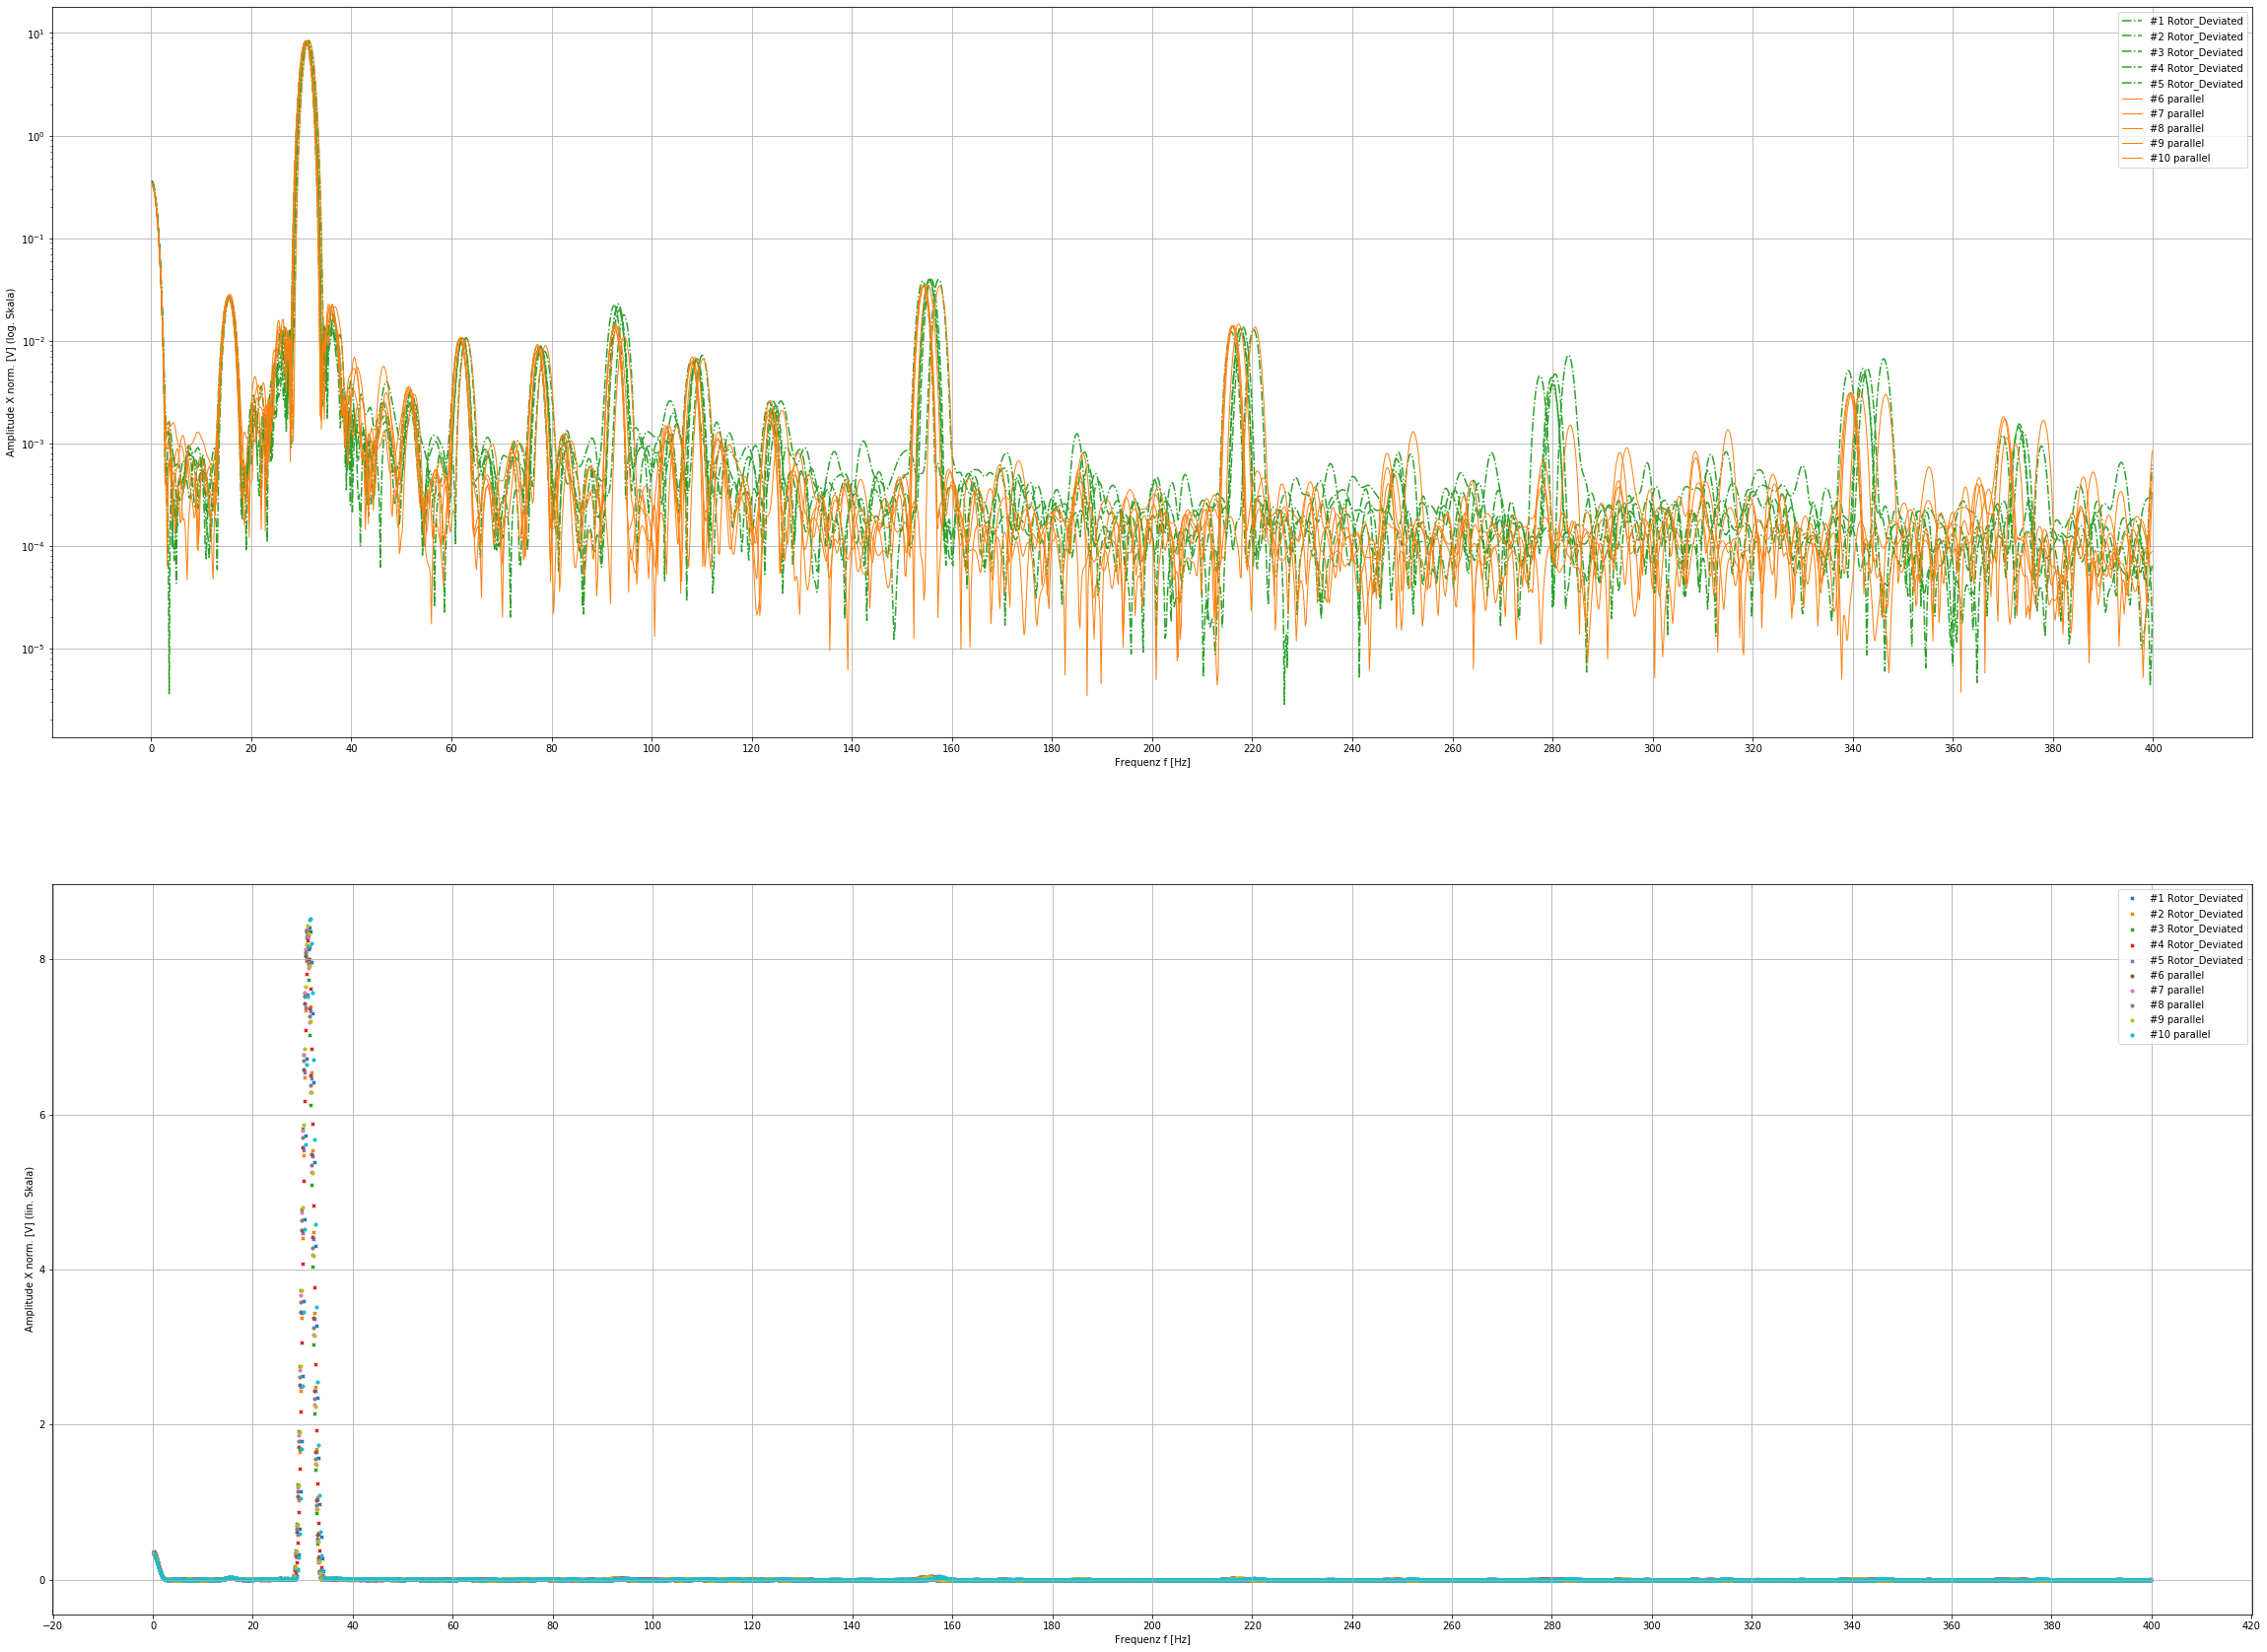

In [26]:
plotfft2(spek,m=0,n=400,dtick=20,plot=0,figsize=(2*20,2*15),file="SpektrumUebersicht")

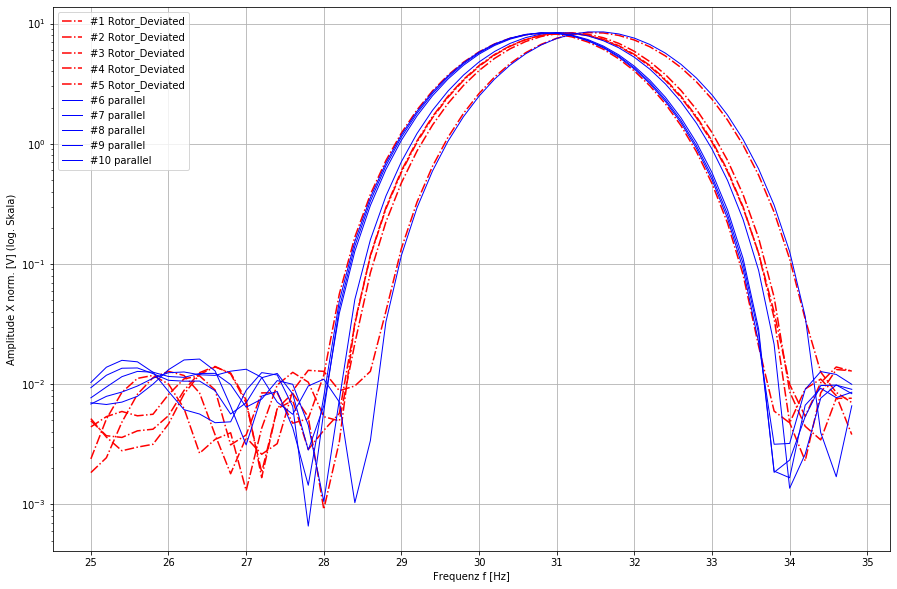

In [27]:
plotfft2(spek,m=25,n=35,dtick=1,plot=1,figsize=(15,10),kontrast=5)

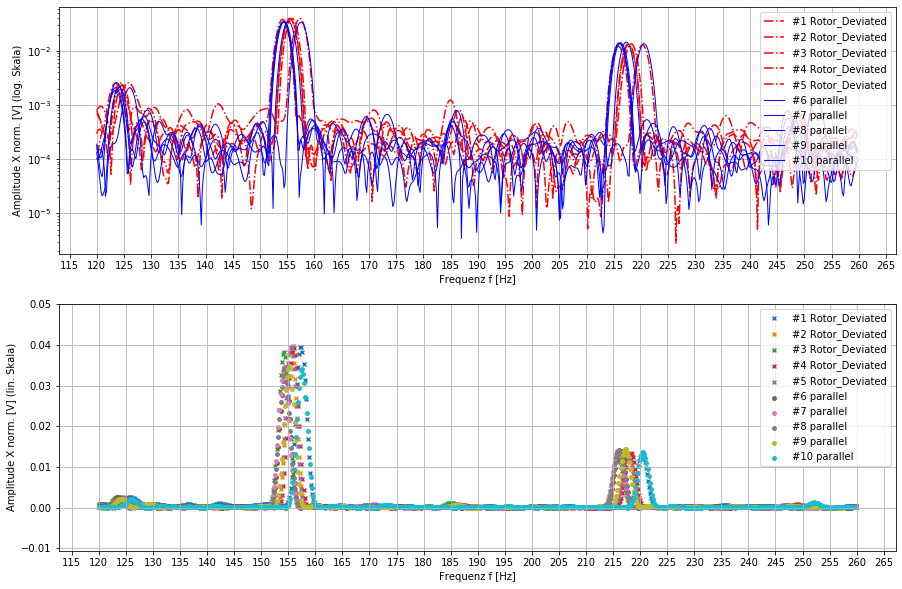

In [28]:
plotfft2(spek,m=120,n=260,sp=15,dtick=5,kontrast=5)

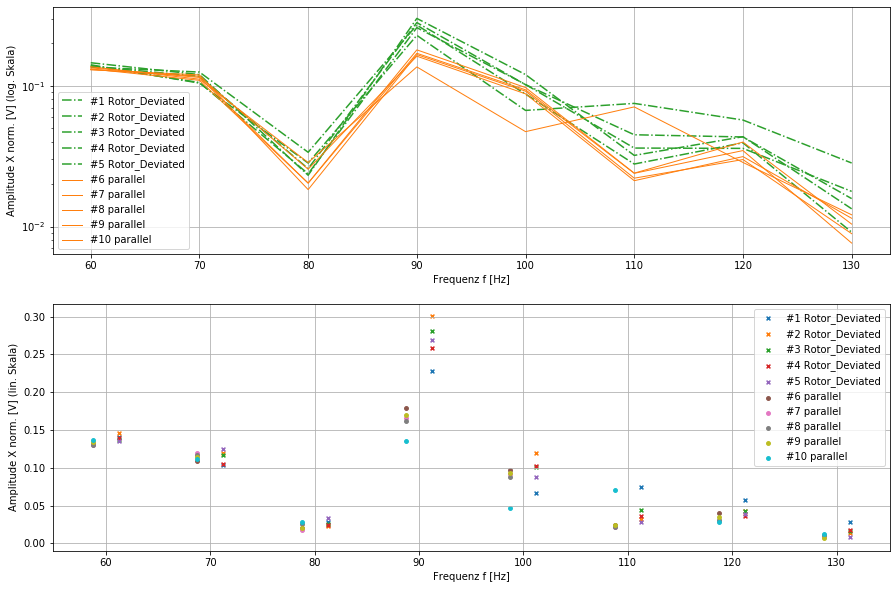

In [29]:
plotfft2(df_b1,m=50,n=140,sp=15,dtick=10)

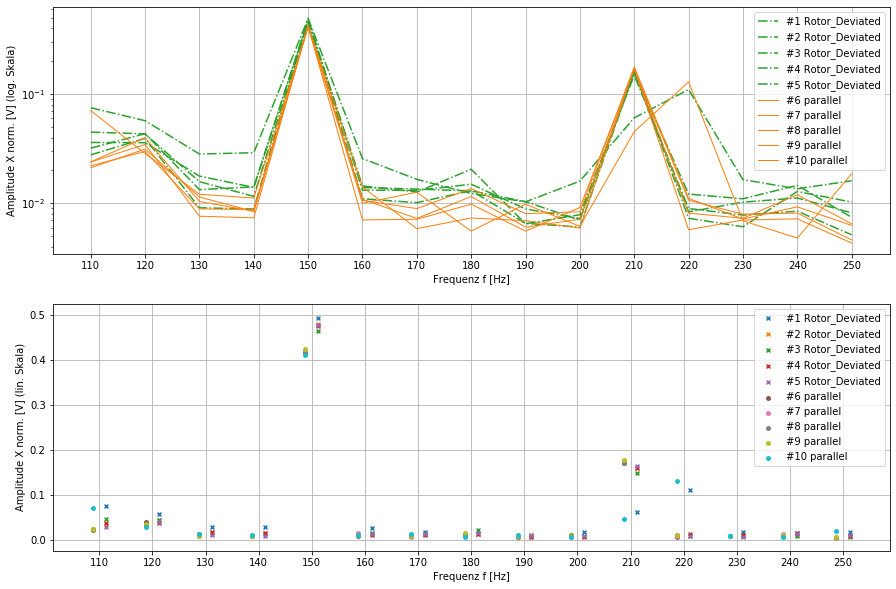

In [30]:
plotfft2(df_b1,m=100,n=260,sp=15,dtick=10)

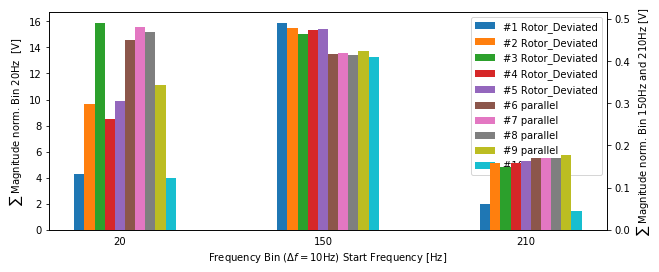

In [31]:
# Bar Chart for MA
fc_plot=[20,150,210]
fig, ax0 = plt.subplots(figsize = (10,4))
ax1=ax0.twinx()
df1=df_b1
width =0.05
x=np.arange(len(fc_plot))
for index, row in scope_dat.iterrows():
    for i in range(len(fc_plot)):
        data=df1.loc[df1['freq']==fc_plot[i],index].values[0]
        if(i==0): ax=ax0;c='Pastel1';#;print('go')
        else:     ax=ax1;c='green'
        #print(i,ax)
        t1='#'+str(index+1)+' '+row['Symbol']
        ax.bar(i+(index-4)*width, data, width=width,color='C'+str(index),label=t1)
#ax0.set_ylim(12.6,13)
#ax1.grid(True)
#ax1.set_ylim(0,0.04)
for ax in [ax0,ax1]:
    ax0.set_xticks(x)
    ax0.set_xticklabels(fc_plot, rotation=0)
    ax0.xaxis.set_ticks_position('none') 
ax0.legend()
ax0.set_xlabel(r"Frequency Bin ($\Delta f=$"+str(round(bin_width))+"Hz) Start Frequency [Hz]")
ax0.set_ylabel(r"$\sum$ Magnitude norm. Bin "+str(fc_plot[0])+"Hz  [V]")
ax1.set_ylabel(r"$\sum$ Magnitude norm. Bin "+str(fc_plot[1])+"Hz and "+str(fc_plot[2])+"Hz [V]")
plt.savefig("fc_Bins_plot.png",qual=600)
plt.show()

# 3. Spektrum mit normierter Frequenz (f_rmp = f1 ± k · fr)
* Durchschnittliche Drehzahl der einzelnen Messungen aus Spektrum (7.Oberwelle) ermitteln
* normierte Frequenzskala erstellen

In [32]:
5# Drehzahl ermitteln
from bisect import bisect_left, bisect_right

k=7
scope_dat['fr_mean']=0
for index, row in scope_dat.iterrows():
    m=bisect_left(spek['freq'].values, 210)
    n=bisect_left(spek['freq'].values, 230)
    max1=spek.iloc[m:n][index].max() # max 7.OW finden, das im bereich zwischen 210 Hz und 230 Hz ist
    fc_max1=spek.loc[(spek[index]==max1),'freq'].values[0]
    fr=fc_max1/(k*p)
    #print(fr)
    scope_dat.loc[index,'fr_mean']=fr

In [33]:
xk_spek=spek.copy()
for index, row in scope_dat.iterrows():
    fr=scope_dat.loc[index,'fr_mean']
    xk_spek[index]=xk_spek['freq']/fr    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


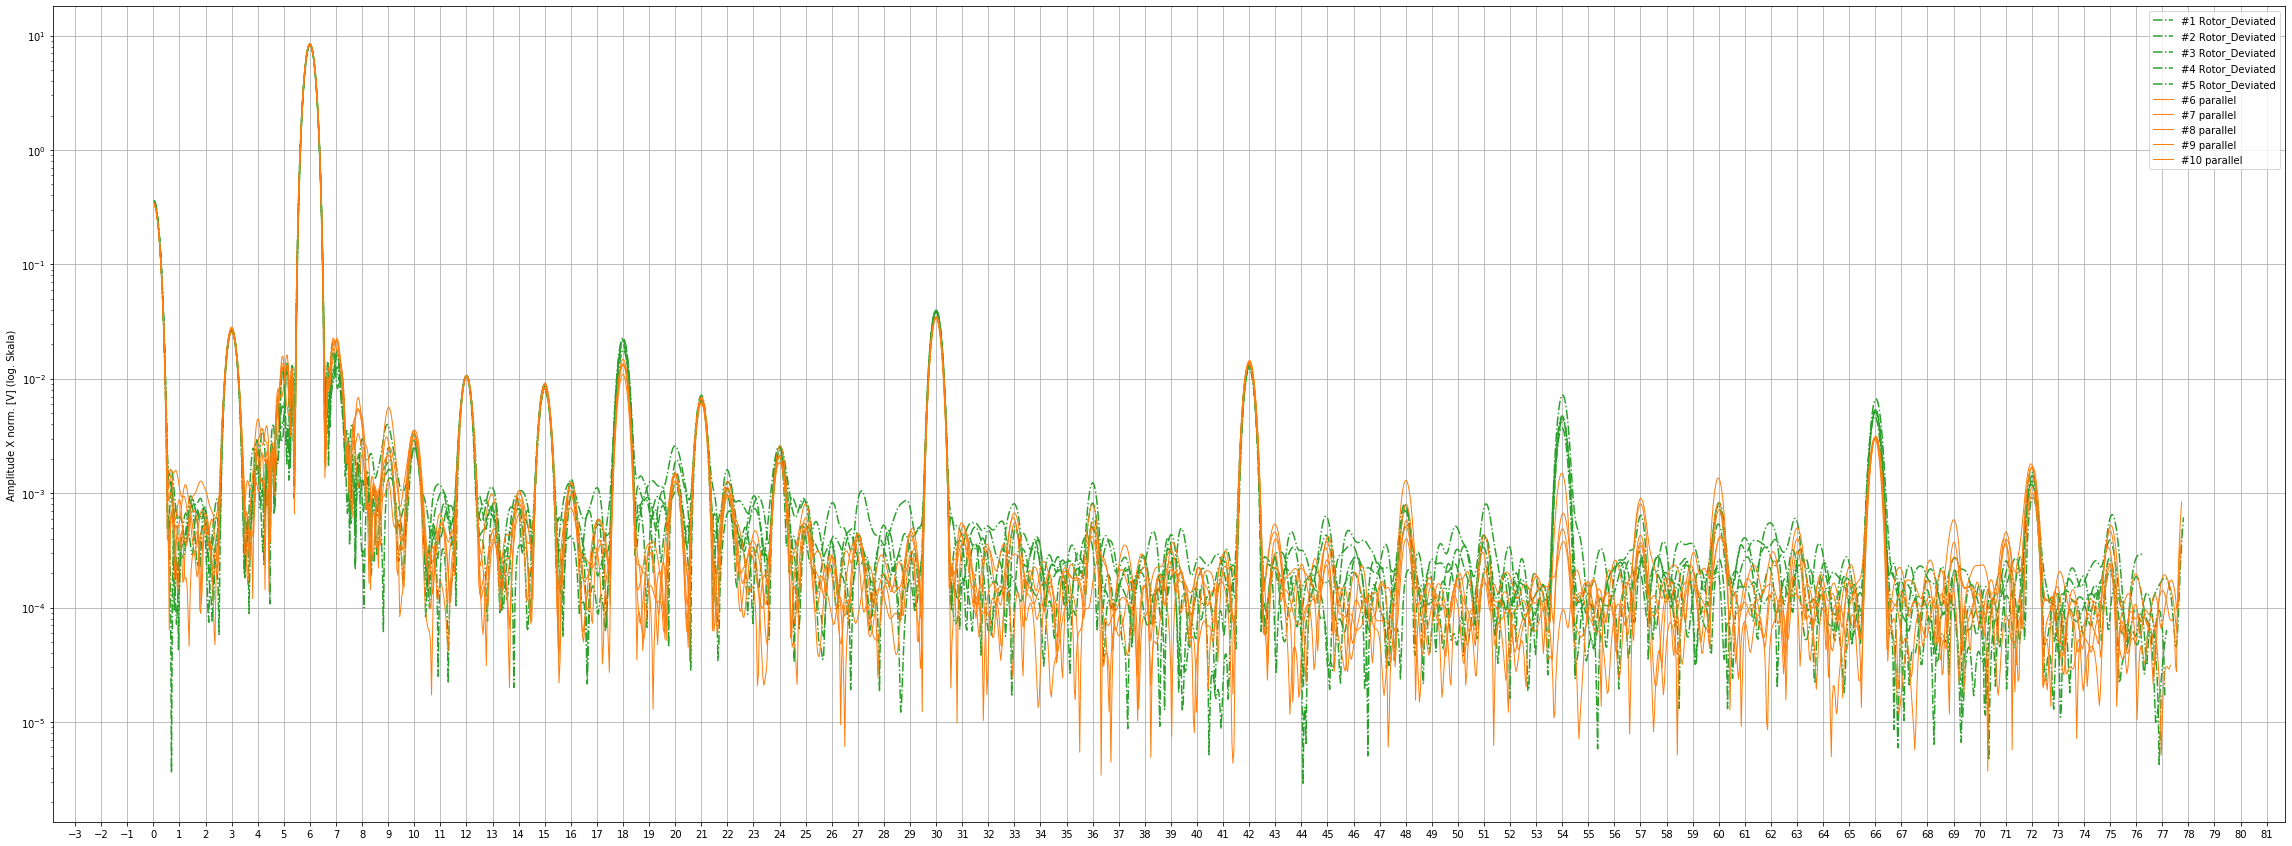

In [34]:
plotfft2(spek,xf=xk_spek,m=0,n=400,dtick=1,plot=1,figsize=(2*20,1*15),qual=3*900,file="SpektrumUebersicht_xk")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


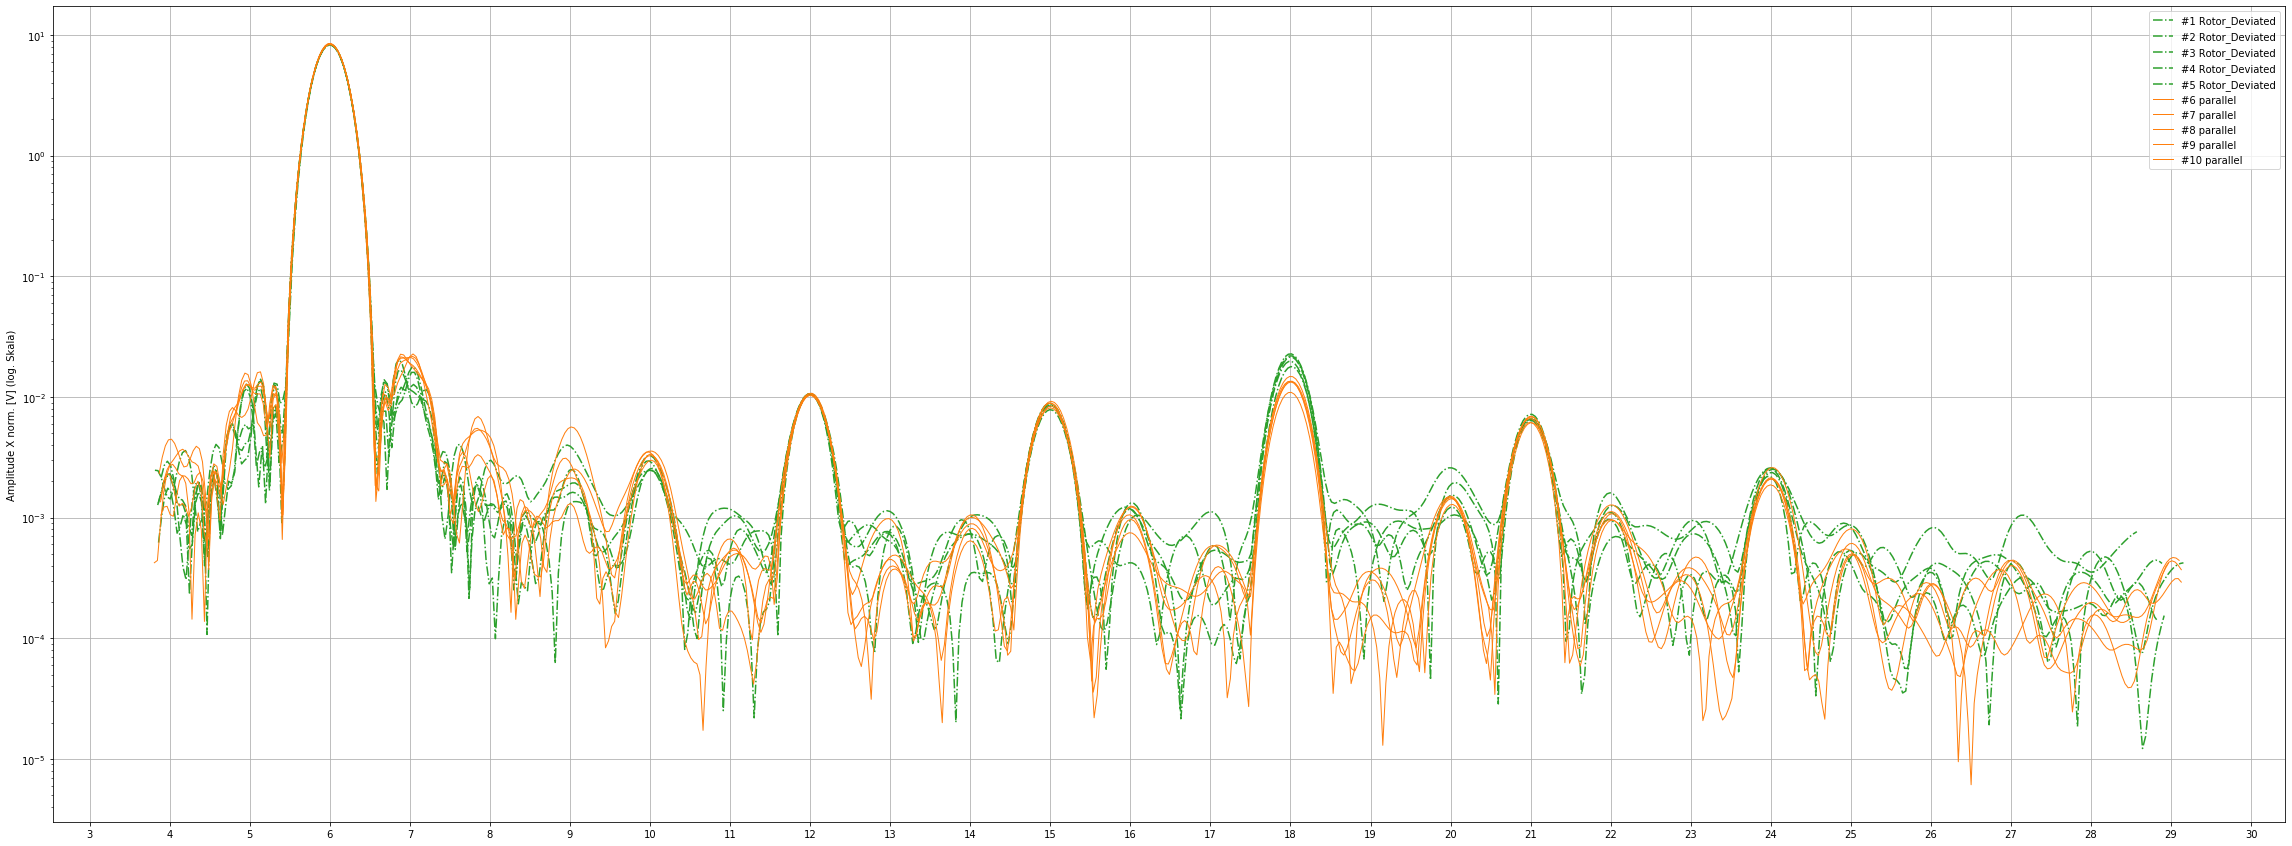

In [35]:
plotfft2(spek,xf=xk_spek,m=20,n=150,dtick=1,plot=1,figsize=(2*20,1*15),qual=1*900,file="SpektrumUebersicht1_xk")

In [36]:
bin_width=0.5
offset=0.5
df_b1=pd.DataFrame()
for index, row in scope_dat.iterrows():
    df_b0=pd.DataFrame()
    df_b0['yf']=spek[index].copy()
    df_b0['xk']=xk_spek[index].copy()
    df_b0['bin']=df_b0['xk']//bin_width
    if(index==0):
        df_b1=df_b0.groupby(['bin']).sum()
        df_b1['xk']=df_b1.index*bin_width
    else:
        df_b1['yf']=df_b0.groupby(['bin'])['yf'].sum()
    df_b1.rename(columns = {"yf": index}, inplace=True)
df_b1['freq']=df_b1['xk']
spek_bins_xk=df_b1.copy()

In [37]:
df_b1

0       xk         1         2         3         4         5  \
bin                                                                            
0.0      2.381171      0.0  2.309255  2.403998  2.345404  2.337679  2.261567   
1.0      0.009181      0.5  0.007648  0.018645  0.013440  0.009479  0.011446   
2.0      0.007247      1.0  0.006588  0.007099  0.006294  0.006212  0.010929   
3.0      0.007724      1.5  0.010432  0.008466  0.005731  0.008065  0.004614   
4.0      0.004403      2.0  0.004590  0.003722  0.004777  0.007142  0.004546   
...           ...      ...       ...       ...       ...       ...       ...   
95363.0  0.000158  47681.5  0.000353  0.000210  0.000192  0.000126  0.000302   
95364.0  0.000237  47682.0  0.000306  0.000213  0.000274  0.000217  0.000194   
95365.0  0.000142  47682.5  0.000212  0.000167  0.000232  0.000321  0.000227   
95366.0  0.000177  47683.0  0.000222  0.000147  0.000201  0.000245  0.000446   
95367.0  0.000049  47683.5  0.000187  0.000132  0.000143  0.000290  0.000131   

                6         7         8         9     freq  
bin                                                       
0.0      2.169534  2.217352  2.203077  2.157207      0.0  
1.0      0.009145  0.021916  0.013961  0.007579      0.5  
2.0      0.005132  0.010876  0.006066  0.003975      1.0  
3.0      0.005979  0.014647  0.004707  0.006774      1.5  
4.0      0.004512  0.009789  0.005857  0.003794      2.0  
...           ...       ...       ...       ...      ...  
95363.0  0.000186  0.000118  0.000189       NaN  47681.5  
95364.0  0.000204  0.000298  0.000325       NaN  47682.0  
95365.0  0.000192  0.000312  0.000171       NaN  47682.5  
95366.0  0.000155  0.000239  0.000217       NaN  47683.0  
95367.0  0.000161  0.000214  0.000085       NaN  47683.5  

[95368 rows x 12 columns]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


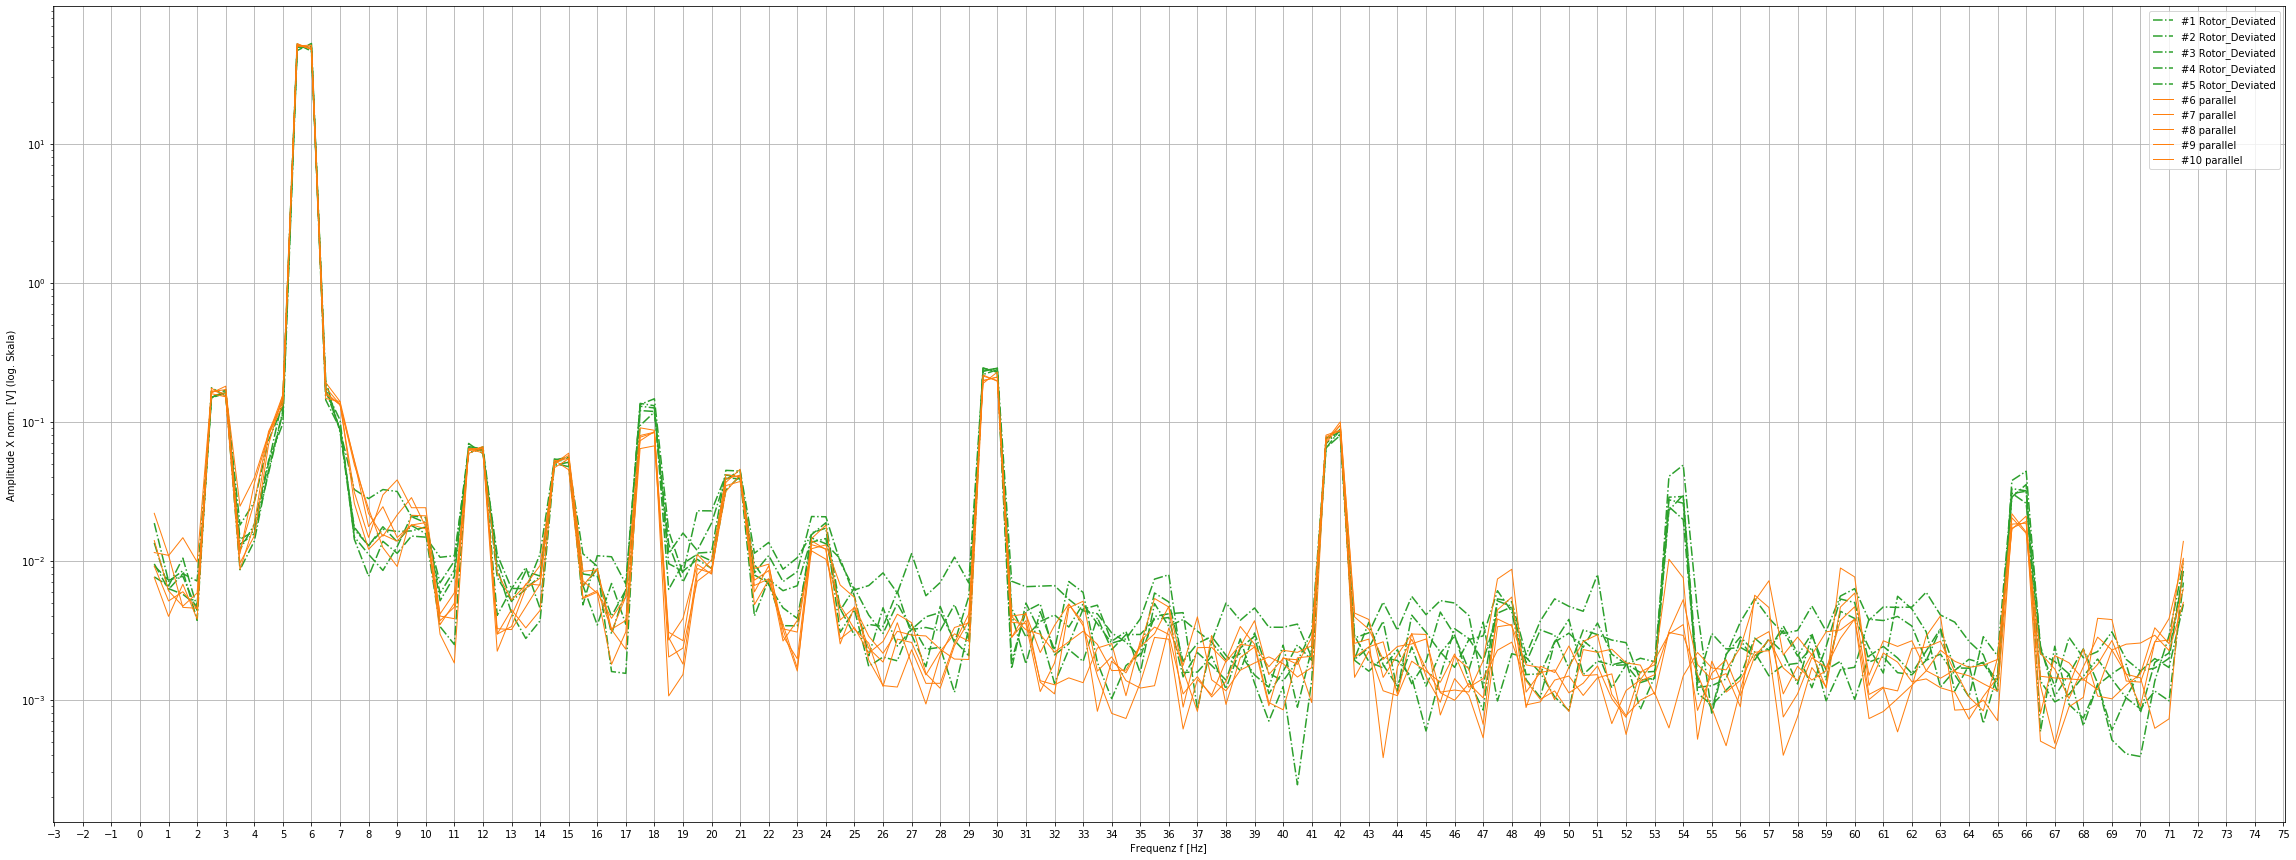

In [38]:
plotfft2(spek_bins_xk,m=0,n=12*p,dtick=1,plot=1,figsize=(2*20,1*15),file="SpektrumUebersicht_xk_b1")

In [39]:
bin_width=1.0
offset=0.5
df_b1=pd.DataFrame()
for index, row in scope_dat.iterrows():
    df_b0=pd.DataFrame()
    df_b0['yf']=spek[index].copy()
    df_b0['xk']=xk_spek[index].copy()
    df_b0['bin']=(df_b0['xk']+offset)//bin_width
    if(index==0):
        df_b1=df_b0.groupby(['bin']).sum()
        df_b1['xk']=df_b1.index*bin_width
    else:
        df_b1['yf']=df_b0.groupby(['bin'])['yf'].sum()
    df_b1.rename(columns = {"yf": index}, inplace=True)
df_b1['freq']=df_b1['xk']
spek_bins_xk=df_b1.copy()

In [40]:
spek_bins_xk.to_pickle('spek_bins_xk1.pkl')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


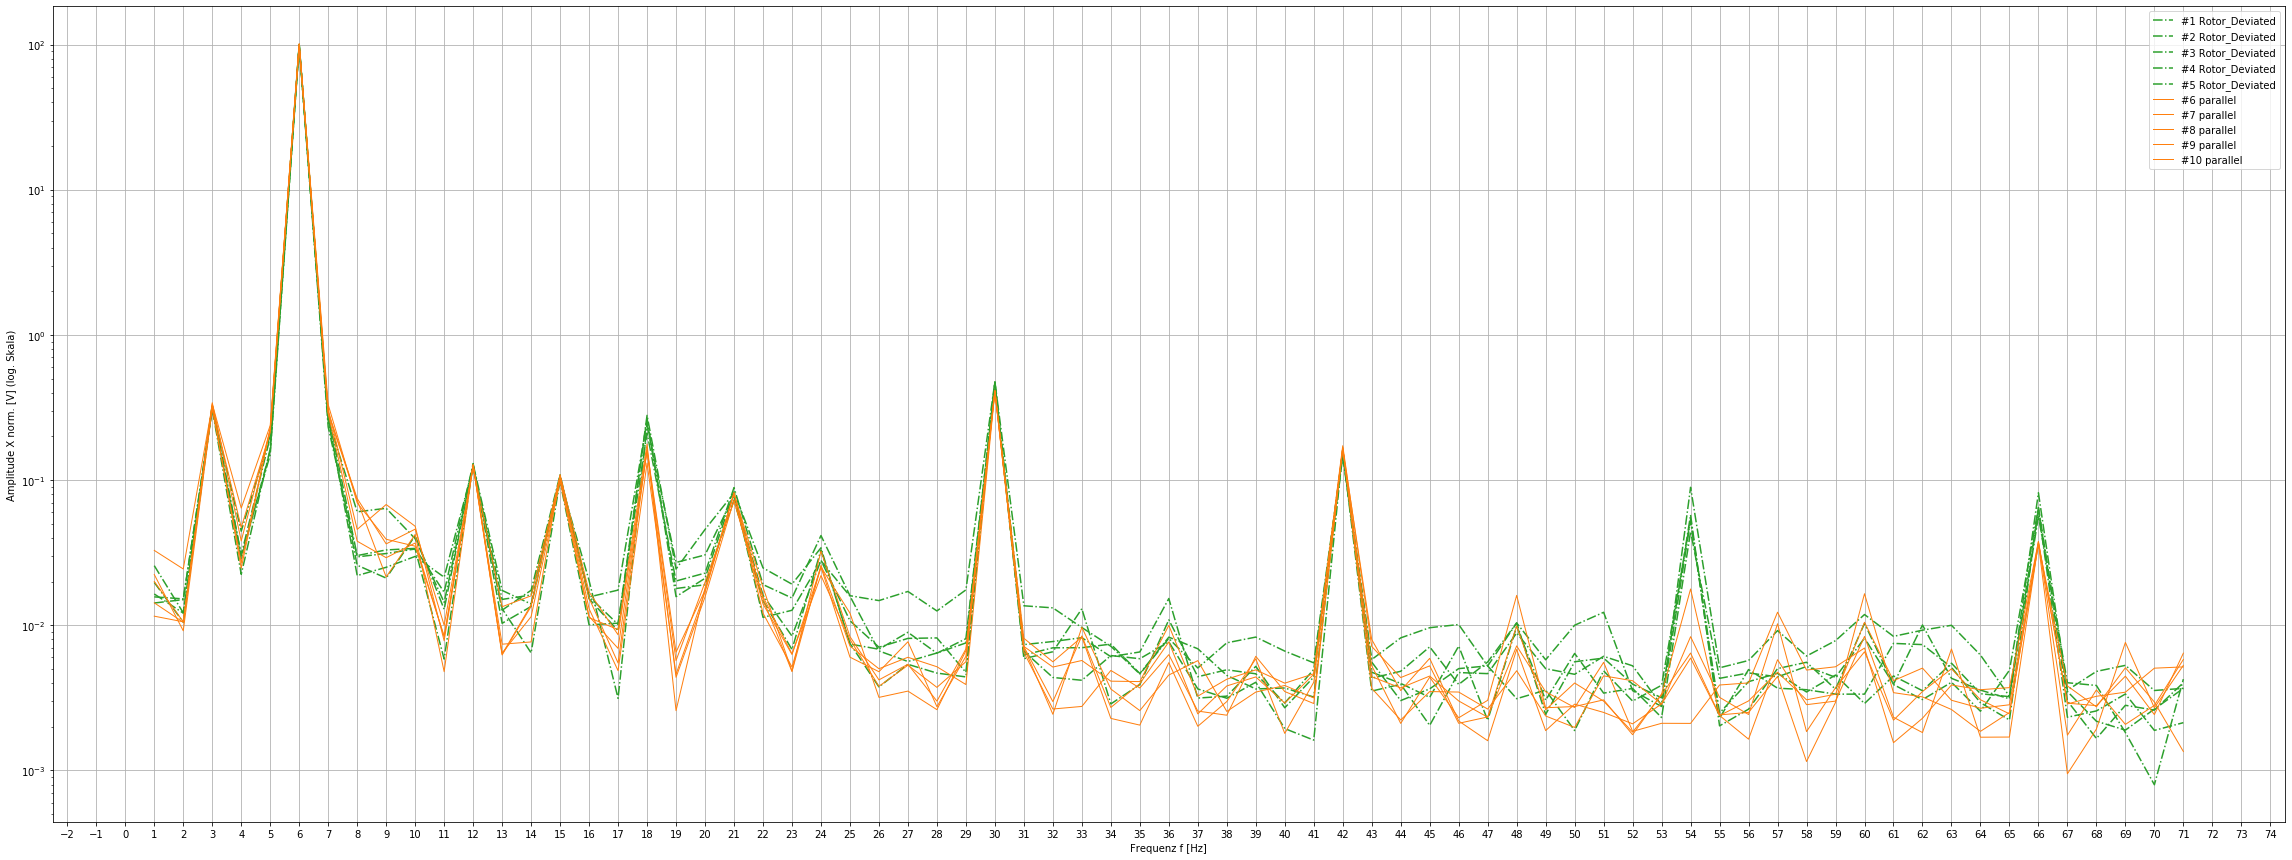

In [41]:
plotfft2(spek_bins_xk,m=0,n=12*p,dtick=1,plot=1,figsize=(2*20,1*15),file="SpektrumUebersicht_xk_b2_log")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


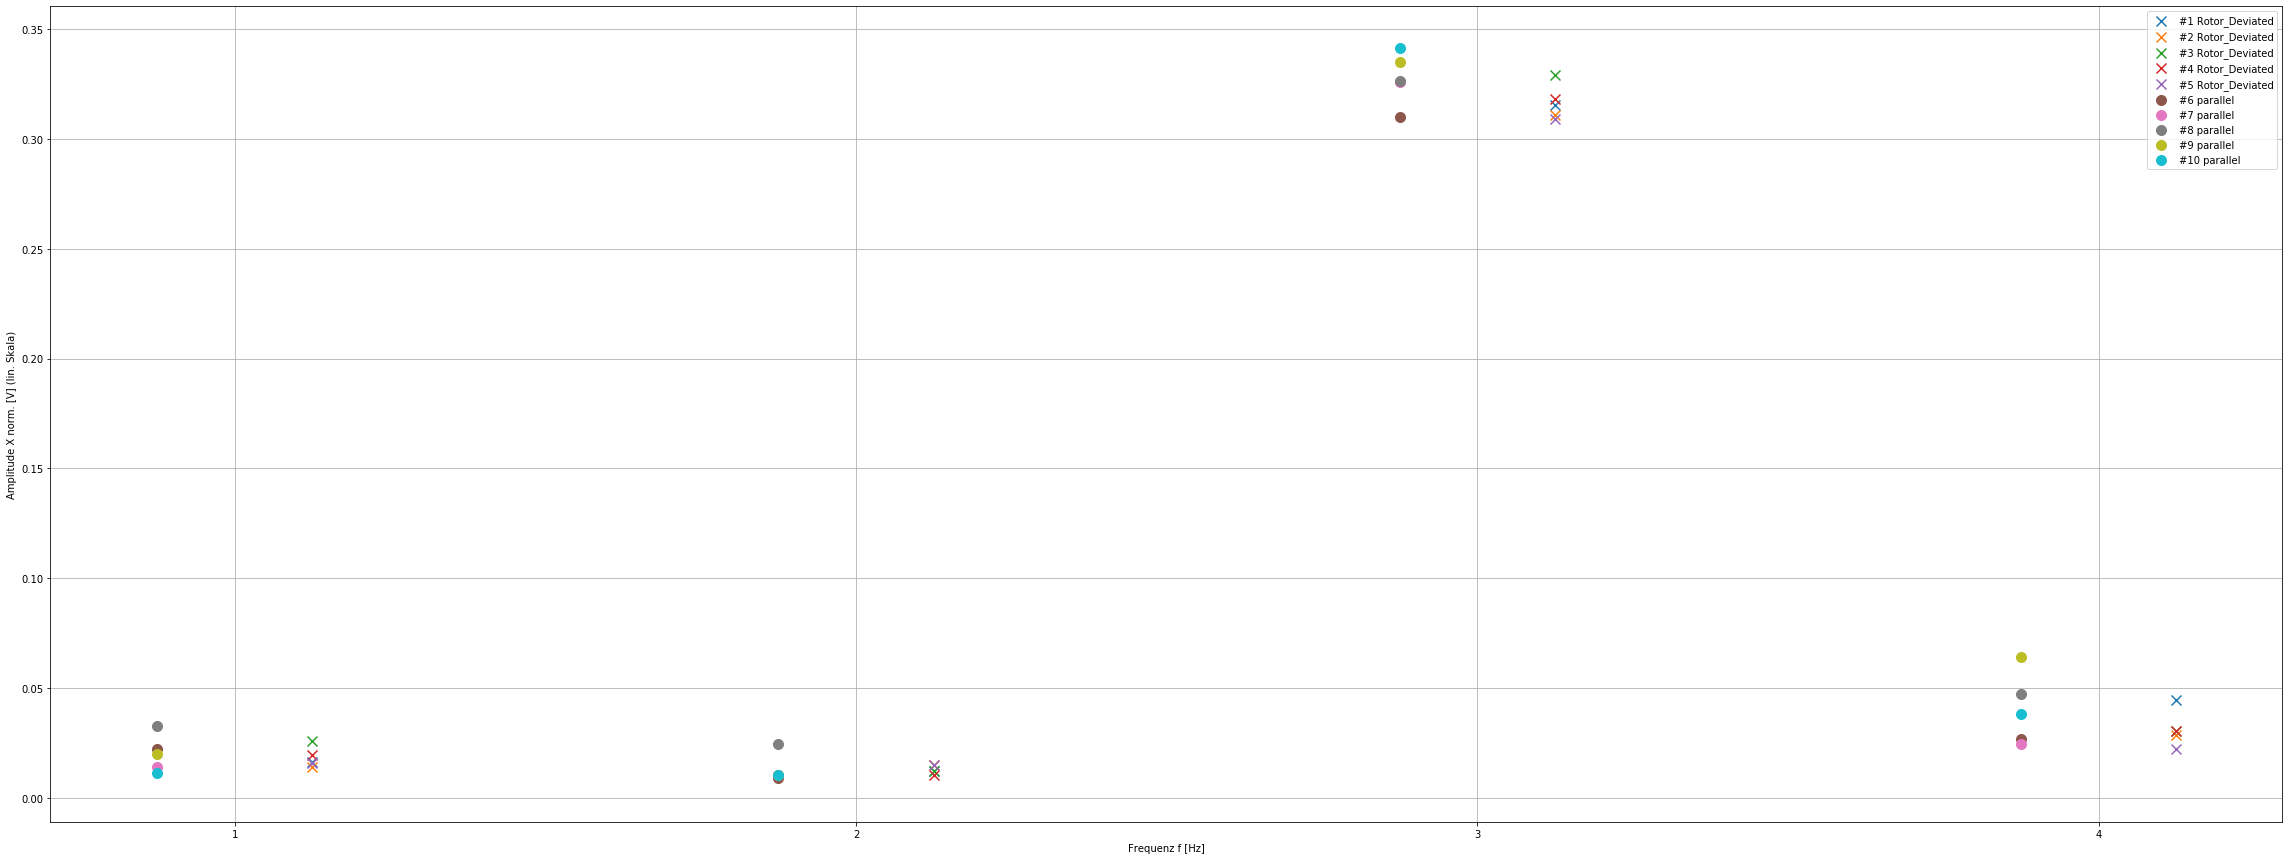

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


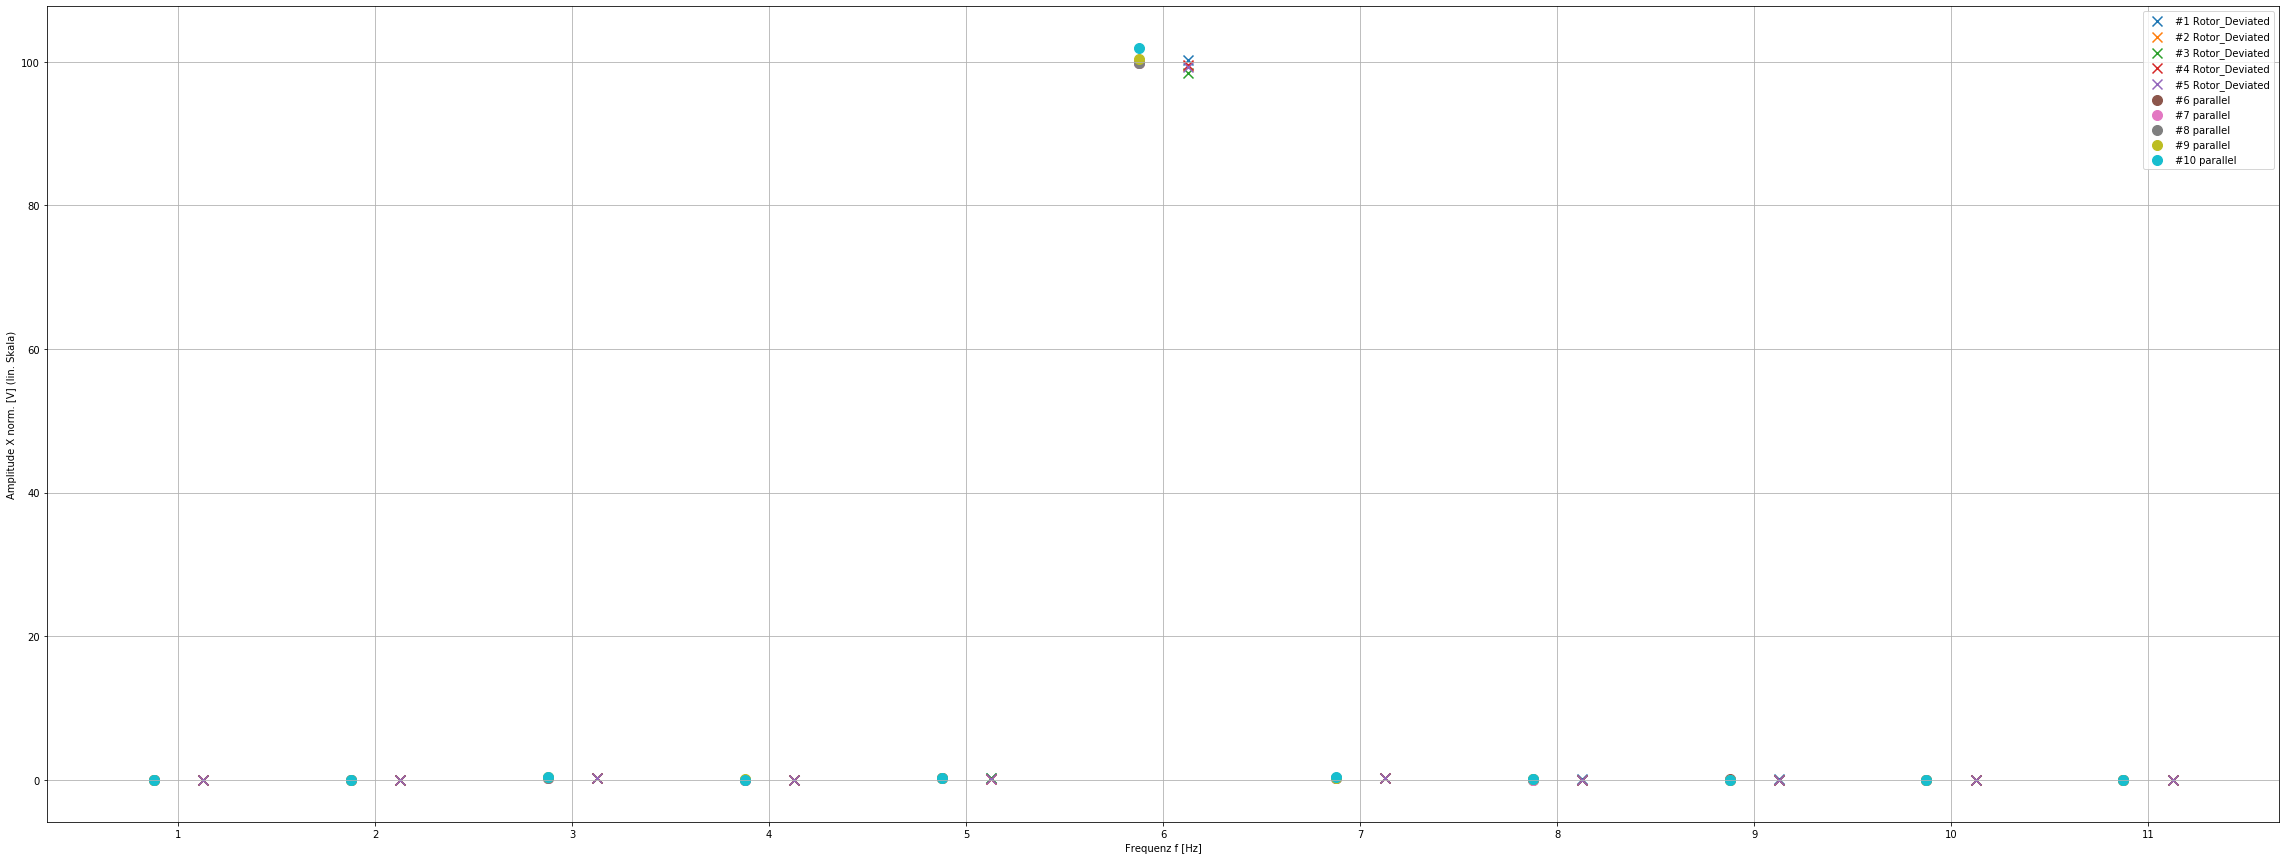

In [42]:
plotfft2(spek_bins_xk,m=0,n=p-1,dtick=1,plot=2,sp=100,figsize=(2*20,1*15),file="SpektrumUebersicht_xk_b2_lin0")
plotfft2(spek_bins_xk,m=0,n=2*p,dtick=1,plot=2,sp=100,figsize=(2*20,1*15),file="SpektrumUebersicht_xk_b2_lin1")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


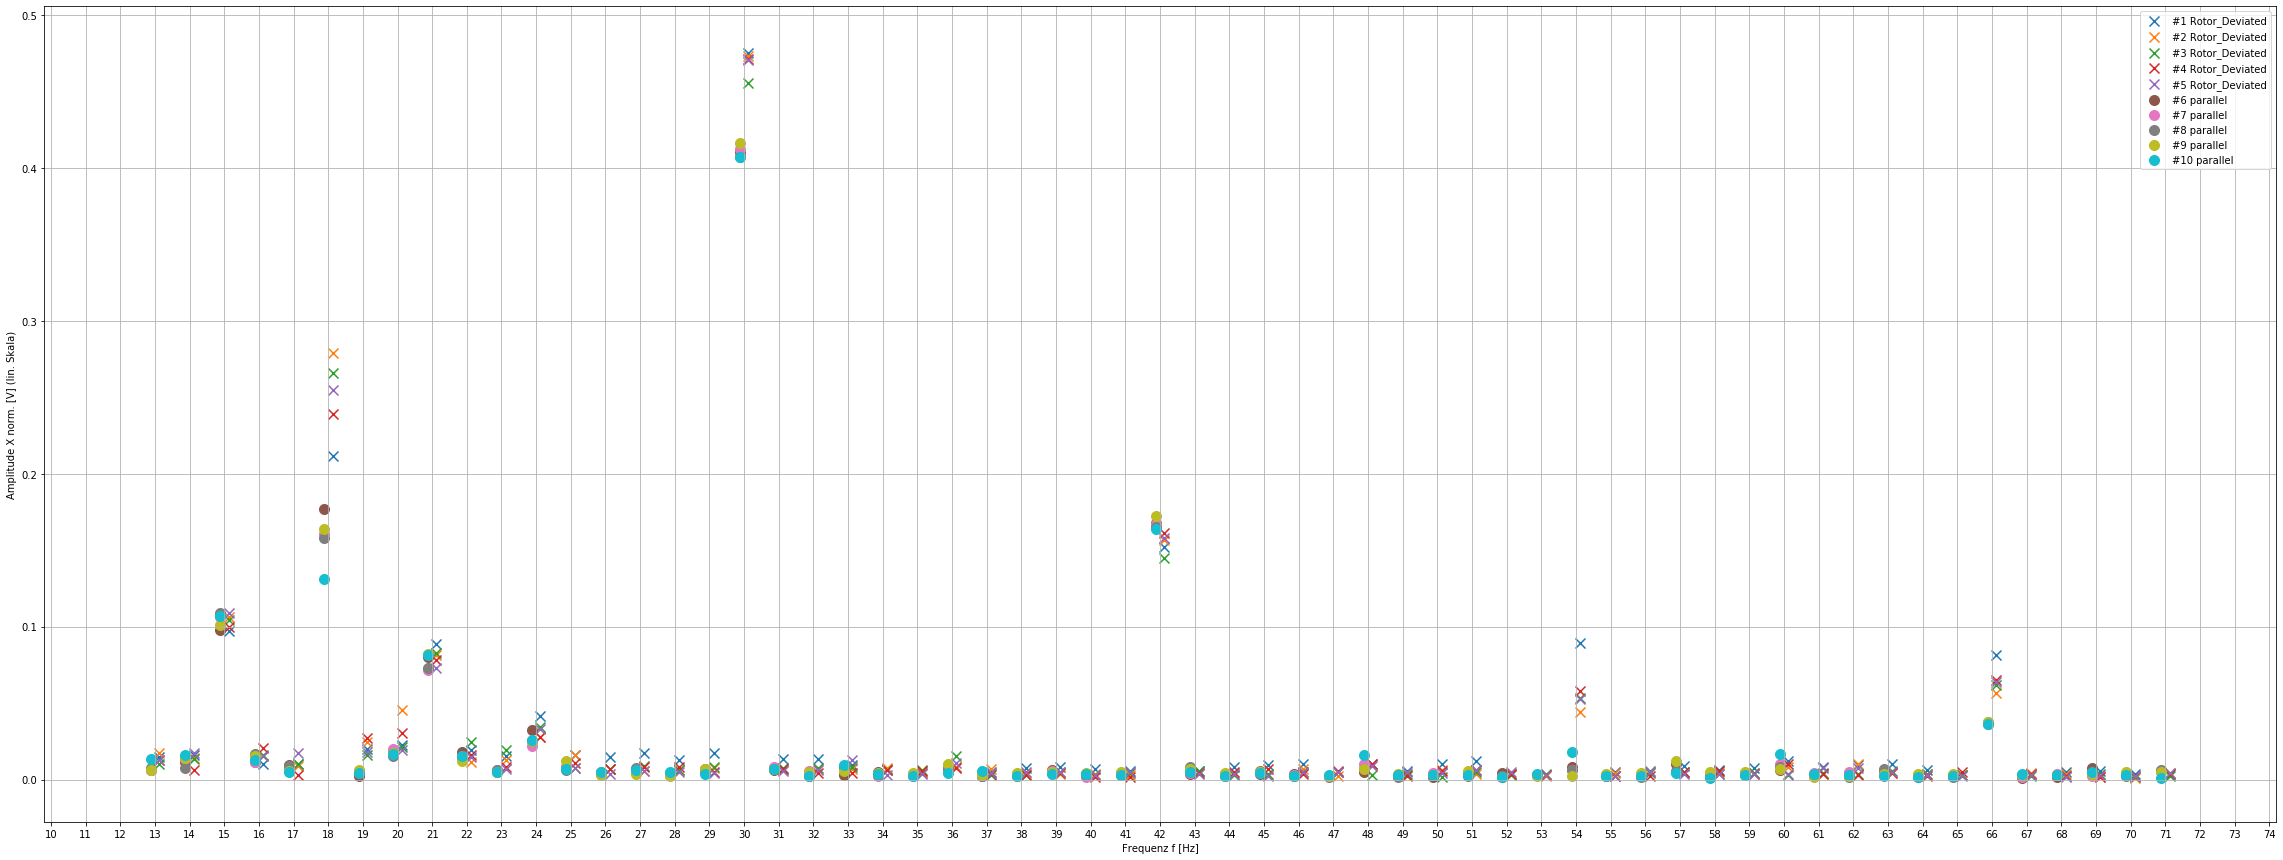

In [43]:
plotfft2(spek_bins_xk,m=2*p,n=12*p,dtick=1,plot=2,sp=100,figsize=(2*20,1*15),file="SpektrumUebersicht_xk_b2_lin2")

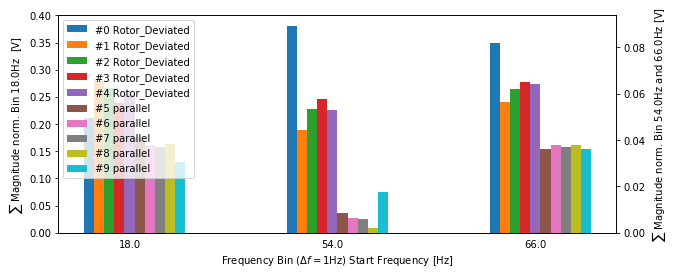

In [44]:
# Bar Chart for MA
fc_plot=[3*p,9*p,11*p]
fig, ax0 = plt.subplots(figsize = (10,4))
ax1=ax0.twinx()
df1=df_b1
width =0.05
x=np.arange(len(fc_plot))
for index, row in scope_dat.iterrows():
    for i in range(len(fc_plot)):
        data=spek_bins_xk.loc[spek_bins_xk['xk']==fc_plot[i],index].values[0]
        if(i==0): ax=ax0;c='Pastel1';#;print('go')
        else:     ax=ax1;c='green'
        #print(i,ax)
        #t1='#'+str(index+1)+' '+row['Symbol']
        t1='#'+str(index)+' '+row['Symbol']
        ax.bar(i+(index-4)*width, data, width=width,color='C'+str(index),label=t1)
ax0.set_ylim(0.0,0.4)
#ax1.grid(True)
#ax1.set_ylim(0,0.04)
for ax in [ax0,ax1]:
    ax0.set_xticks(x)
    ax0.set_xticklabels(fc_plot, rotation=0)
    ax0.xaxis.set_ticks_position('none') 
ax0.legend(loc=2)
ax0.set_xlabel(r"Frequency Bin ($\Delta f=$"+str(round(bin_width))+"Hz) Start Frequency [Hz]")
ax0.set_ylabel(r"$\sum$ Magnitude norm. Bin "+str(fc_plot[0])+"Hz  [V]")
ax1.set_ylabel(r"$\sum$ Magnitude norm. Bin "+str(fc_plot[1])+"Hz and "+str(fc_plot[2])+"Hz [V]")
plt.savefig("fc_Bins_plot.png",qual=600)
plt.show()

## Übersichts Diagramm für MA mit Mittelwerten

* Aufnahmen 0 und 9 sind schneller, niedrigere 3.OW , größere 9.OW

In [48]:
spek_mean=pd.DataFrame()
scope_dat['index_copy']=scope_dat.index
Symbols=['Rotor_Deviated','parallel']
for sym in Symbols:
    col_schief=scope_dat.loc[scope_dat['Symbol']==sym,'index_copy'].values
    spek_mean[sym]=spek_bins_xk.loc[:,col_schief].mean(axis=1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


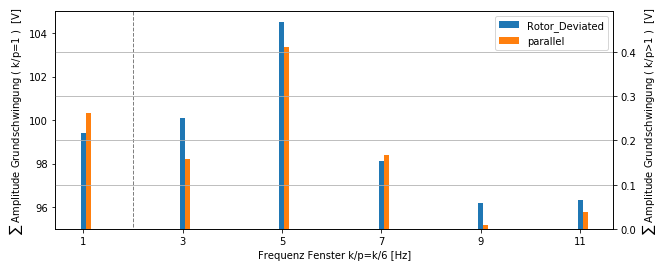

In [49]:
# Bar Chart for MA
fc_plot=np.array([1,3,5,7,9,11])
fc_plot_p=fc_plot*p
fig, ax0 = plt.subplots(figsize = (10,4))
ax1=ax0.twinx()
width =0.05
x=np.arange(len(fc_plot))
#for index, row in scope_dat.iterrows():
for i_sym,sym in enumerate(Symbols):
    for i_fc,fcp in enumerate(fc_plot_p):
        data=spek_mean.iloc[int(fcp)][sym]
        if(fcp==6): ax=ax0
        else:     ax=ax1
        #print(i_sym,sym,i_fc,fcp,ax,data)
        ax.bar(i_fc+i_sym*width,data,width=width,label=sym,color='C'+str(i_sym))
ax0.vlines(x=0.5,ymin=0,ymax=500,color='grey',lw=1,ls='--')
ax0.set_ylim(95.0,105.0)
ax1.grid(True)
#ax1.set_ylim(0,0.04)
for ax in [ax0]:
    ax0.set_xticks(x)
    ax0.set_xticklabels(fc_plot, rotation=0)
    #ax0.xaxis.set_ticks_position('none') 
ax0.legend(loc=1)
ax0.set_xlabel(r"Frequenz Fenster k/p=k/6 [Hz]")
ax0.set_ylabel(r"$\sum$ Amplitude Grundschwingung ( k/p=1 )  [V]")
ax1.set_ylabel(r"$\sum$ Amplitude Grundschwingung ( k/p>1 )  [V]")
plt.savefig("fc_Bins_plot_Rotorauslenkung.eps",qual=600)
plt.show()